<div
     style="padding: 20px;
            color: white;
            font-size: 250%;
            text-align: center;
            display: fill;
            border-radius: 5px;
            background-color: #023c66;
            overflow: hidden;
            font-weight: 700;
            border: 5px solid #F28C28;"
     >
    LAB: Image Classification (CAT/DOG/PANDAS)
</div>

Suppose you were given a few images of cats, dogs and pandas. Specifically, you are tasked to build a deep feed-forward NN to classify them. The data can be found at: https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda, and part of the code to read the images can be found under the code section.

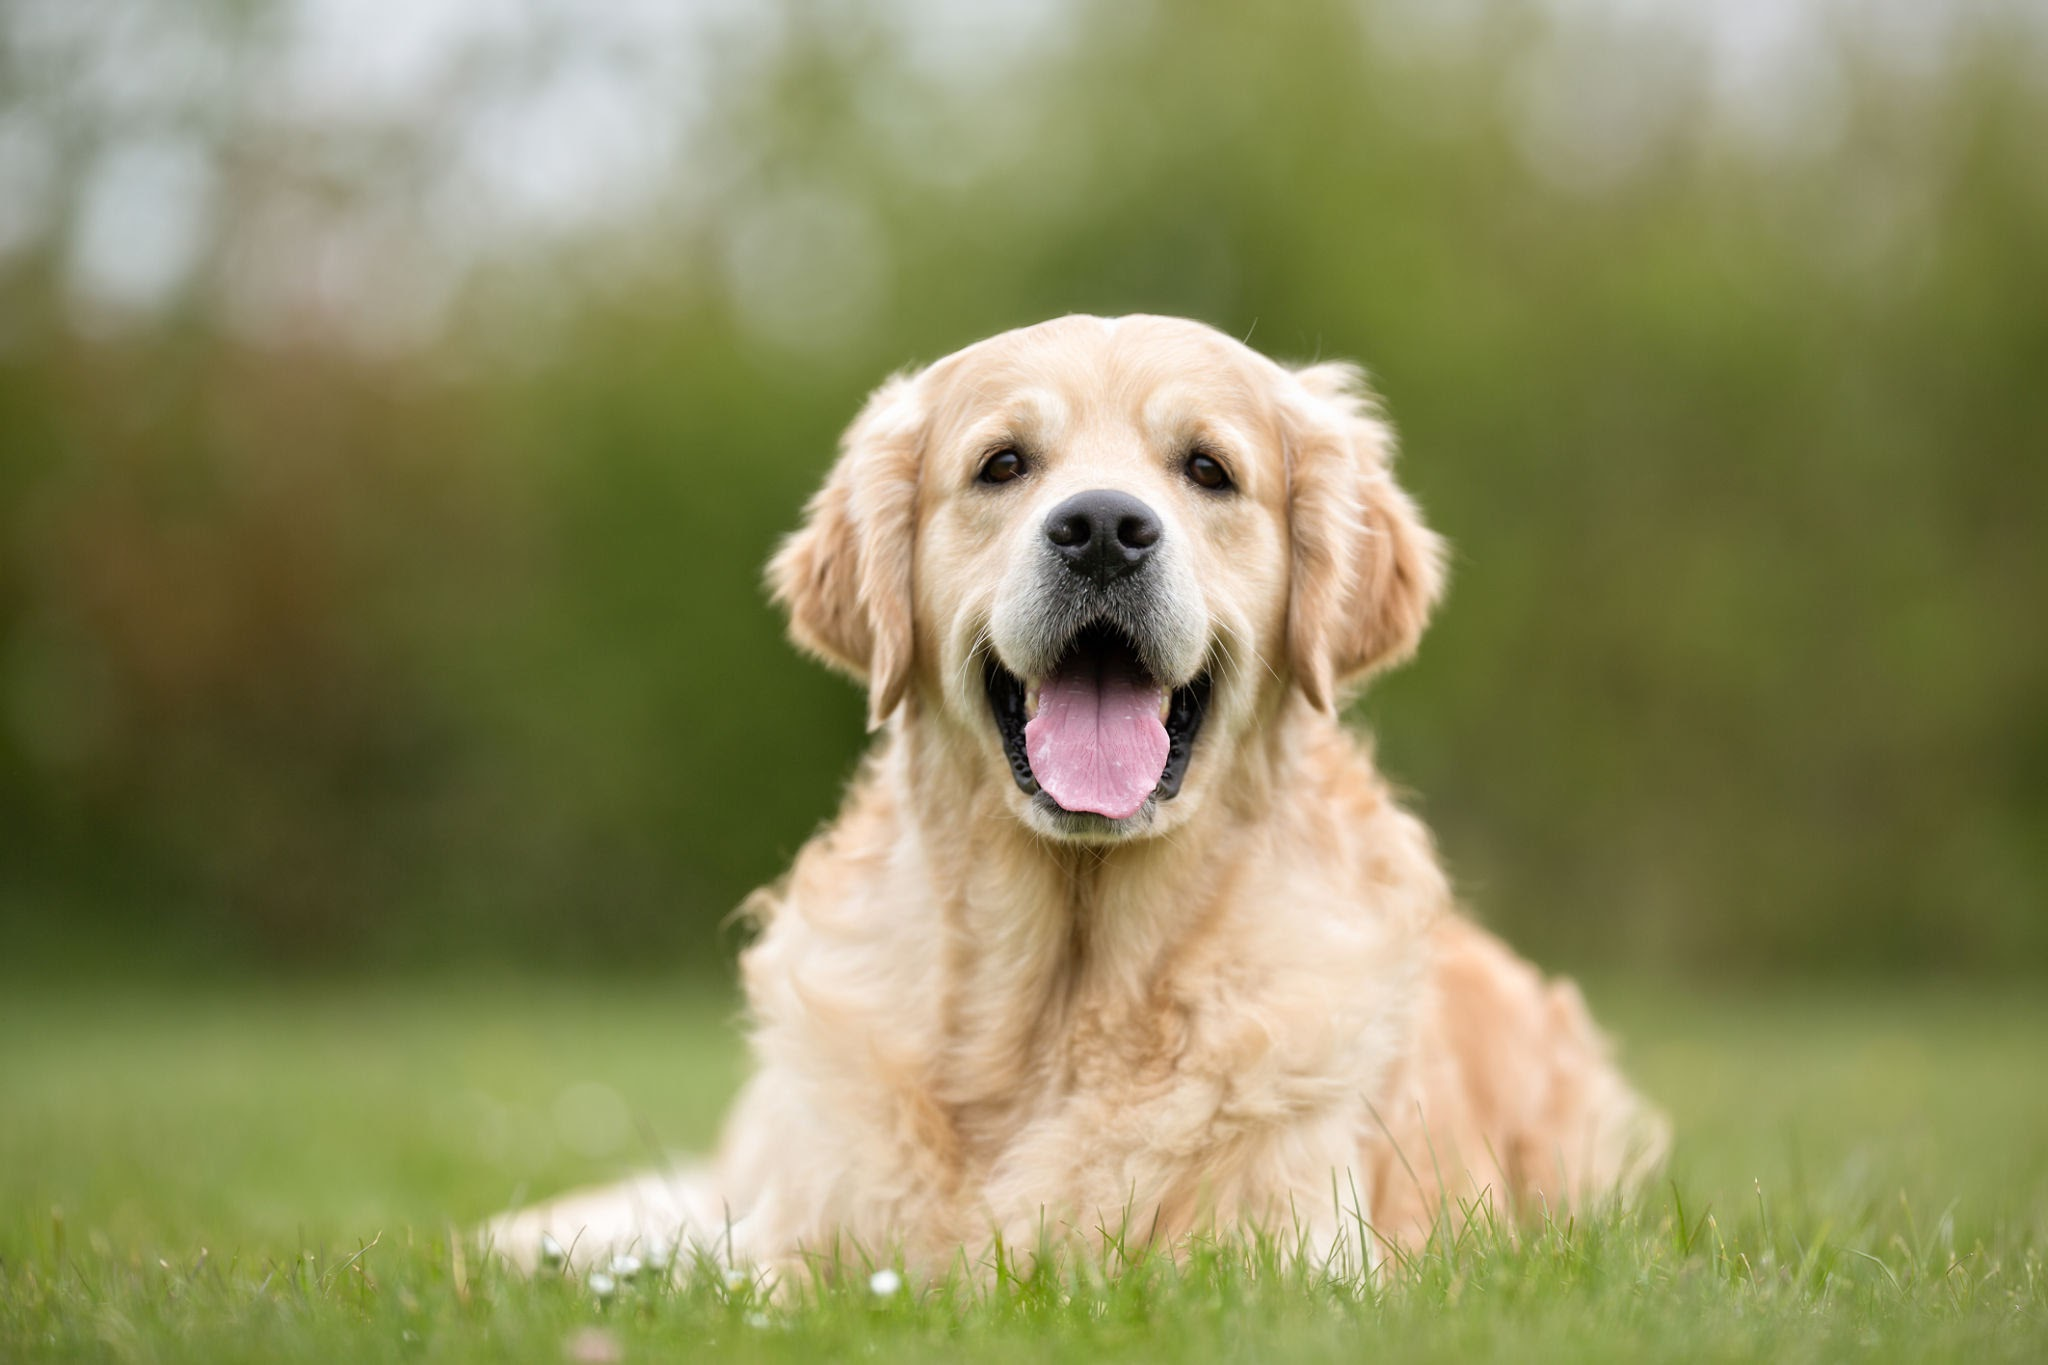

In [1]:
## import data by using google drive download. The zip folder is 197MB in size
## use !pip install gdown if not installed in local computer
## google colab has installation

import gdown
!gdown 1gcqIs0v9B0dZtZ3crxcrKGmIogU1RaPm

Downloading...
From (original): https://drive.google.com/uc?id=1gcqIs0v9B0dZtZ3crxcrKGmIogU1RaPm
From (redirected): https://drive.google.com/uc?id=1gcqIs0v9B0dZtZ3crxcrKGmIogU1RaPm&confirm=t&uuid=a729ee0e-df79-4fb9-80fd-93a7b8fa6c31
To: /content/cats_dogs_pandas.zip
100% 197M/197M [00:01<00:00, 144MB/s]


In [2]:
## use the code below to extract the zip file to the colab computer
## alternatively change to your drive e.g., '/Users/martinwg/Documents/cats_dogs_pandas.zip' if using local computer
import zipfile
zip_ref = zipfile.ZipFile('/content/cats_dogs_pandas.zip', 'r')
zip_ref.extractall()
zip_ref.close()

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>Creating a Path Object</b></p>
</div>

In [3]:
## creating a path object

import matplotlib.pyplot as plt
import os
path = '/content/cats_dogs_pandas/' # paste the path to the data here

categories = ['cats', 'dogs', 'pandas']

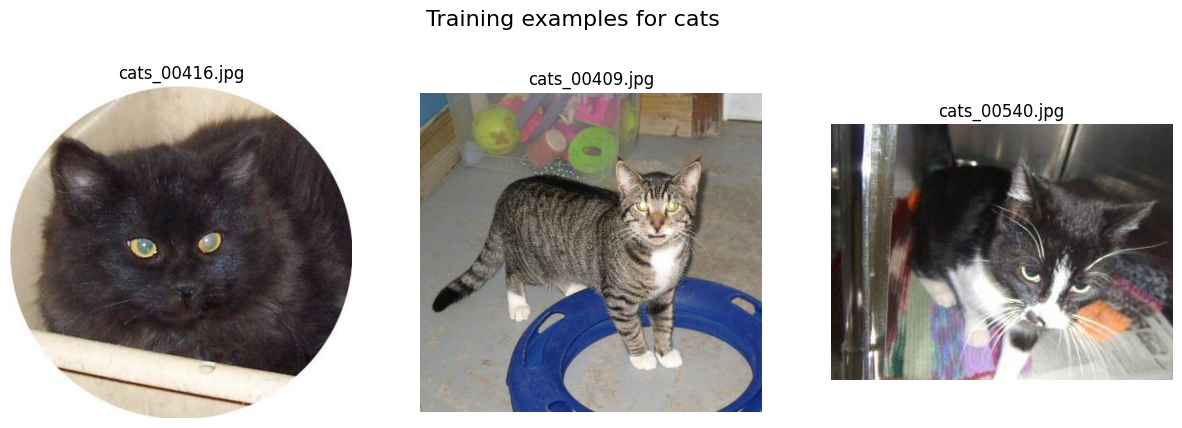

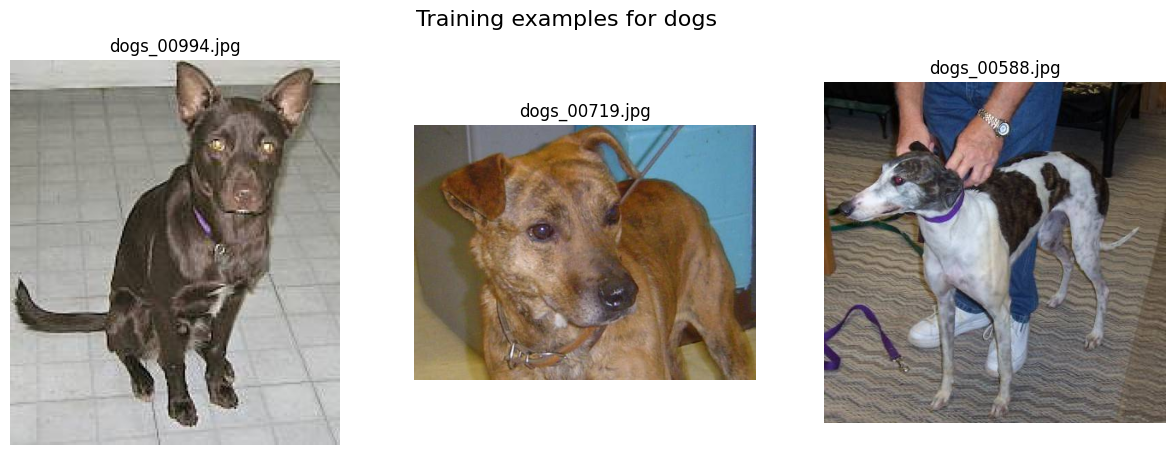

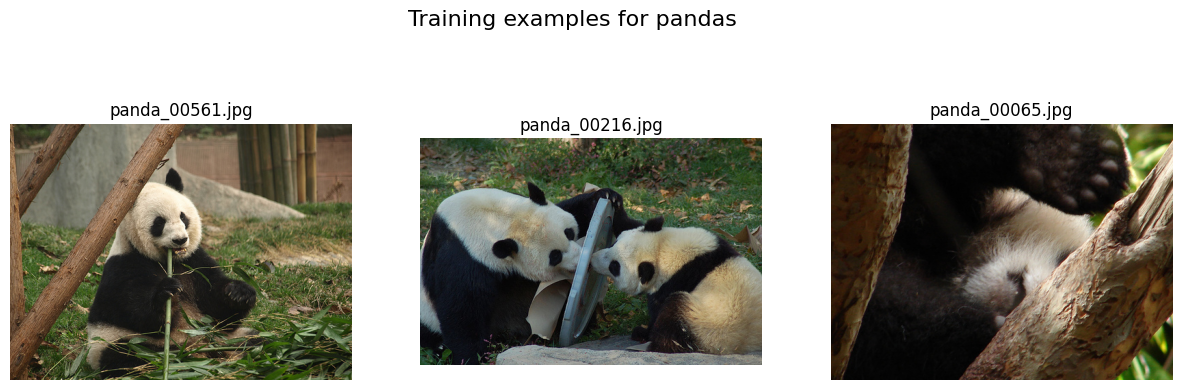

In [4]:
# prompt: plot a few training examples

import matplotlib.pyplot as plt
import os
import random

# Assuming 'path', 'categories' are defined from previous code

for category in categories:
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  fig.suptitle(f'Training examples for {category}', fontsize=16)

  category_path = os.path.join(path, category)
  images = os.listdir(category_path)
  random_images = random.sample(images, 3)

  for i, image_file in enumerate(random_images):
    image_path = os.path.join(category_path, image_file)
    img = plt.imread(image_path)
    axs[i].imshow(img)
    axs[i].set_title(image_file)
    axs[i].axis('off')

  plt.show()


#### **Our Architecture**

CNN uses filters to create different images. Images are 600x600 (large). Many sophisticated models just 224x224x3

In [5]:
## let's read images and resize to 80x80
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## instance
image_gen = ImageDataGenerator(rescale=1/255, validation_split=0.2)  ## standardization can be done

## create training dataset object
## train_dataset contains (X, y)
train_dataset = image_gen.flow_from_directory(batch_size = 32,
                                              directory = path,
                                              shuffle = True,
                                              target_size = (80, 80),
                                              subset = "training",
                                              class_mode = "categorical")

validation_dataset = image_gen.flow_from_directory(batch_size = 32,
                                              directory = path,
                                              shuffle = True,
                                              target_size = (80, 80),
                                              subset = "validation",
                                              class_mode = "categorical")

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [6]:
## CNN
## Input
## Conv2D(32)
## BatchNormalization
## MaxPool
## Conv2D(64)
## BatchNormalization
## MaxPool
## Conv2D(128)
## BatchNormalization
## MaxPool
## Flatten
## Dense (512)
## Dropout(0.5)
## Dense (256)
## Dropout(0.5)
## Output(3)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Input

model = Sequential()
model.add(Input(shape=(80, 80, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 78, 78, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,421,059 (16.87 MB)

 Trainable params: 4,420,611 (16.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
## Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
## Callbacks (Early Stopping, Model Checkpoint - save the best model)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('our_CNN.keras', save_best_only=True)

In [9]:
## Train the model
history = model.fit(train_dataset,
                    validation_data = validation_dataset,
                    epochs = 50,
                    callbacks = [early_stop, checkpoint])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.5293 - loss: 3.1921 - val_accuracy: 0.3333 - val_loss: 3.8822
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5675 - loss: 1.5100 - val_accuracy: 0.3300 - val_loss: 2.8452
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.6013 - loss: 0.9788 - val_accuracy: 0.3717 - val_loss: 2.1727
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6328 - loss: 0.7698 - val_accuracy: 0.3367 - val_loss: 1.3384
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.6739 - loss: 0.6927 - val_accuracy: 0.4350 - val_loss: 1.1964
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.6832 - loss: 0.6491 - val_accuracy: 0.5200 - val_loss: 0.9290
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.6984 - loss: 0.6187 - val_accuracy: 0.5817 - val_loss: 0.8105
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7006 - loss: 0.5851 - val_accuracy: 0.6267 - val_loss: 

<Axes: >

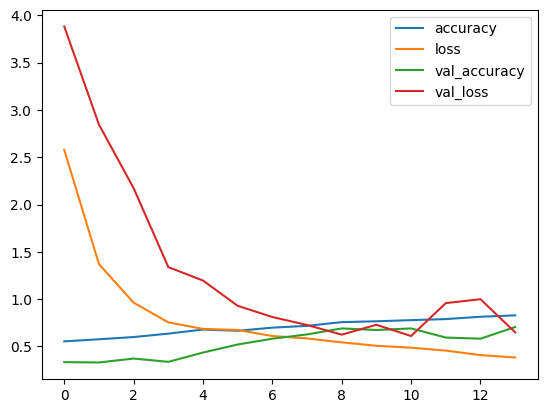

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [12]:
## metrics
## X, y sklearn won't as well
loss_cnn, accuracy_cnn = model.evaluate(validation_dataset)
print(f"Loss: {loss_cnn}, Accuracy: {accuracy_cnn}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6950 - loss: 0.5890
Loss: 0.6094716191291809, Accuracy: 0.6899999976158142


In [13]:
# prompt: use model to predict the image Labrador_Retriever_portrait.jpg

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('our_CNN.keras')

# Load and preprocess the image
img_path = 'Labrador_Retriever_portrait.jpg'  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(80, 80))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

# Make the prediction
predictions = model.predict(x)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the predicted class (assuming class indices 0, 1, 2 correspond to 'cats', 'dogs', 'pandas')
class_labels = ['cats', 'dogs', 'pandas']
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
Predicted class: dogs


## **Transfer Learning**

Using a famous model for our data.

In [20]:
## let's use VGG16
## limitation: if model was fit in tensorflow, use tensorflow

from tensorflow.keras.applications import VGG16 ## you can download VGG16.keras

## Let's use only the CONV and Pooling
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(80, 80, 3))

## let's not CHANGE any of the weights (fix)
for layer in base_model.layers:
  layer.trainable = False

## Transfer this model to my data
model_vgg16 = Sequential()
model_vgg16.add(base_model) ## transfer to new model
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(3, activation='softmax'))
model_vgg16.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,895,875 (60.64 MB)

 Trainable params: 1,181,187 (4.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
## compile
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
## fit
history_vgg16 = model_vgg16.fit(train_dataset,
                    validation_data = validation_dataset,
                    epochs = 50,
                    callbacks = [early_stop, checkpoint])

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - accuracy: 0.4835 - loss: 1.1486 - val_accuracy: 0.7333 - val_loss: 0.6050
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.7161 - loss: 0.6420 - val_accuracy: 0.7883 - val_loss: 0.5272
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.7895 - loss: 0.5238 - val_accuracy: 0.7900 - val_loss: 0.4703
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.8184 - loss: 0.4674 - val_accuracy: 0.8050 - val_loss: 0.4569
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.8216 - loss: 0.4231 - val_accuracy: 0.8000 - val_loss: 0.4428
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.8417 - loss: 0.3987 - val_accuracy: 0.7867 - val_loss: 0.4669
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.8306 - loss: 0.3873 - val_accuracy: 0.7917 - val_loss: 0.4822
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.8548 - loss: 0.3547 - val_accuracy: 0.7933 -

In [24]:
## performance
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(validation_dataset)
print(f"Loss: {loss_vgg16}, Accuracy: {accuracy_vgg16}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8210 - loss: 0.4002
Loss: 0.4428078234195709, Accuracy: 0.800000011920929


In [25]:
# prompt: use model to predict the image Labrador_Retriever_portrait.jpg

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('our_CNN.keras')

# Load and preprocess the image
img_path = 'Labrador_Retriever_portrait.jpg'  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(80, 80))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

# Make the prediction
predictions = model.predict(x)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print the predicted class (assuming class indices 0, 1, 2 correspond to 'cats', 'dogs', 'pandas')
class_labels = ['cats', 'dogs', 'pandas']
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: dogs
